In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import lite
from keras import layers
from keras.models import Sequential


In [3]:
batch_size = 16
img_height = 58
img_width = 30

data_dir = os.getcwd() + "\\data\\cropped_rank"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 12922 files belonging to 14 classes.
Using 10338 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 12922 files belonging to 14 classes.
Using 2584 files for validation.


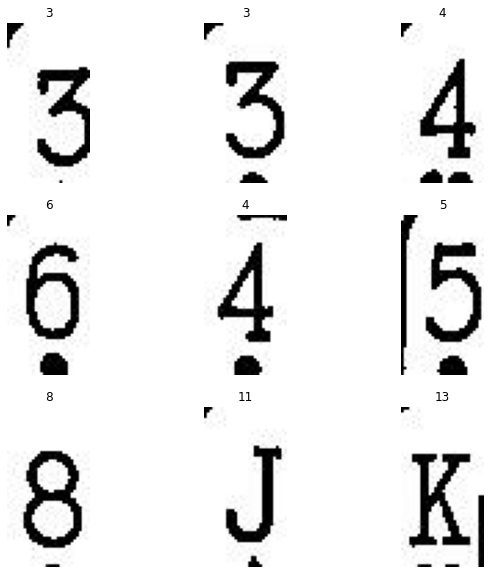

In [5]:
#See if images are there.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

In [6]:
class_names = ['na', 'ace', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'jack', 'queen', 'king']

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(16, 58, 30, 3)
(16,)


In [8]:
autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

In [9]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height,
                                  img_width,
                                  3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 58, 30, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 58, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 15, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 7, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 7, 64)         1

In [12]:
epochs = 8
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/8
647/647 [==============================] - 17s 13ms/step - loss: 0.2887 - accuracy: 0.9157 - val_loss: 0.0084 - val_accuracy: 0.9973
Epoch 2/8
647/647 [==============================] - 7s 10ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0100 - val_accuracy: 0.9946
Epoch 3/8
647/647 [==============================] - 6s 10ms/step - loss: 0.0093 - accuracy: 0.9980 - val_loss: 0.0051 - val_accuracy: 0.9985
Epoch 4/8
647/647 [==============================] - 7s 10ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 1.3553e-04 - val_accuracy: 1.0000
Epoch 5/8
647/647 [==============================] - 6s 10ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 3.0999e-05 - val_accuracy: 1.0000
Epoch 6/8
647/647 [==============================] - 6s 10ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 1.5425e-04 - val_accuracy: 1.0000
Epoch 7/8
647/647 [==============================] - 6s 10ms/step - loss: 4.5923e-04 - accuracy: 0.9999 - val_loss: 2.0828e-04 - val_ac

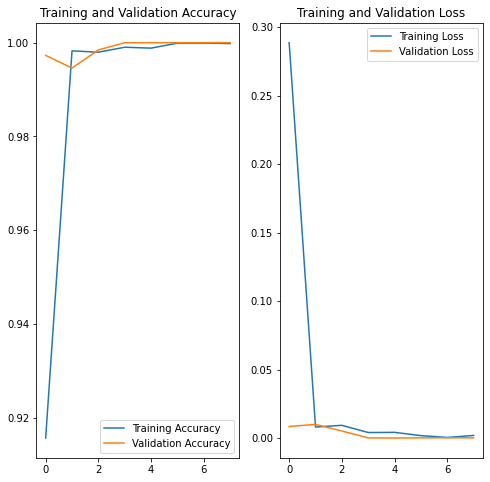

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [14]:
"""
files_to_guess = ['/content/drive/MyDrive/test_images_rank/ace.jpg',
                  '/content/drive/MyDrive/test_images_rank/two.jpg',
                  '/content/drive/MyDrive/test_images_rank/two_1.jpg',
                  '/content/drive/MyDrive/test_images_rank/two_2.jpg',
                  # '/content/drive/MyDrive/test_images_rank/three.jpg',
                  # '/content/drive/MyDrive/test_images_rank/four.jpg',
                 # '/content/drive/MyDrive/test_images_rank/five.jpg',
                  '/content/drive/MyDrive/test_images_rank/six.jpg',
                  # '/content/drive/MyDrive/test_images_rank/seven.jpg',
                  # '/content/drive/MyDrive/test_images_rank/eight.jpg',
                  # '/content/drive/MyDrive/test_images_rank/nine.jpg',
                  # '/content/drive/MyDrive/test_images_rank/ten.jpg',
                  # '/content/drive/MyDrive/test_images_rank/jack.jpg',
                  # '/content/drive/MyDrive/test_images_rank/queen.jpg',
                  # '/content/drive/MyDrive/test_images_rank/king.jpg'
                  ]

for path in files_to_guess:
  img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(path)
  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
"""

'\nfiles_to_guess = [\'/content/drive/MyDrive/test_images_rank/ace.jpg\',\n                  \'/content/drive/MyDrive/test_images_rank/two.jpg\',\n                  \'/content/drive/MyDrive/test_images_rank/two_1.jpg\',\n                  \'/content/drive/MyDrive/test_images_rank/two_2.jpg\',\n                  # \'/content/drive/MyDrive/test_images_rank/three.jpg\',\n                  # \'/content/drive/MyDrive/test_images_rank/four.jpg\',\n                 # \'/content/drive/MyDrive/test_images_rank/five.jpg\',\n                  \'/content/drive/MyDrive/test_images_rank/six.jpg\',\n                  # \'/content/drive/MyDrive/test_images_rank/seven.jpg\',\n                  # \'/content/drive/MyDrive/test_images_rank/eight.jpg\',\n                  # \'/content/drive/MyDrive/test_images_rank/nine.jpg\',\n                  # \'/content/drive/MyDrive/test_images_rank/ten.jpg\',\n                  # \'/content/drive/MyDrive/test_images_rank/jack.jpg\',\n                  # \'/content/d

In [15]:
model.save(os.getcwd() + "\\data\\model\\rank_model")

INFO:tensorflow:Assets written to: C:\Users\ablaz\Dropbox\Universitet\DTU\F22\62410-cdio-project\SolitaireCDIO\python\data\model\rank_model\assets


In [16]:
converter = tf.lite.TFLiteConverter.from_saved_model(os.getcwd() + "\\data\\model\\rank_model")
tflite_model = converter.convert()

with open(os.getcwd() + "\\data\\model\\rank_model\\tflite_rank_model.tflite", 'wb') as f:
  f.write(tflite_model)



In [17]:
  keras_file = os.getcwd() + "\\data\\model\\rank_model\\keras\\rank.h5"
  tf.keras.models.save_model(model,keras_file)
  converter = lite.TFLiteConverter.from_keras_model(model)
  tfmodel = converter.convert()

  open(os.getcwd() + "\\data\\model\\rank_model\\keras\\rank.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\ablaz\AppData\Local\Temp\tmphbd6qy2e\assets


793660